Loss function helps in optimizing the parameters of the neural networks. ... The loss is calculated using loss function by matching the target(actual) value and predicted value by a neural network. Then we use the gradient descent method to optimize the weights of the network such that the loss is minimized.

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline  

Lets create some random data first.

In [4]:
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

L2-loss, also called as l2-norm or euclidean distance. It is just square of the distance to the target. It is generally used because it is very curved near target and algorithms can converge fast.

L2 Loss Function is used to minimize the error which is the sum of the all the squared differences between the true value and the predicted value.

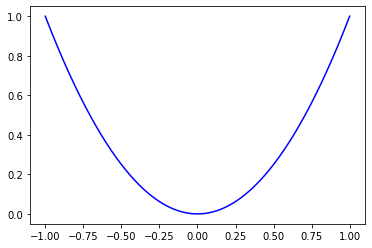

In [5]:
sess = tf.Session()
l2_y_vals = tf.square(target-x_vals)
l2_y_out = sess.run(l2_y_vals)
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-')
plt.show()

L1-loss also called absolute loss. In L1 norm, instead of taking square, we just take absolute value. The L1 norm is better for outliers as it doesnot steep for larger values. L1 norm is not smooth at target, and this can result in algorithm not converging well.

##### L1 Regularization (Lasso penalisation)
The L1 regularization adds a penalty equal to the sum of the absolute value of the coefficients. The L1 regularization will shrink some parameters to zero. Hence some variables will not play any role in the model, L1 regression can be seen as a way to select features in a model.

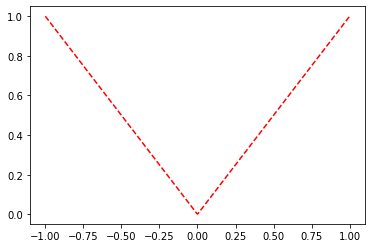

In [6]:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)
x_array = sess.run(x_vals)
plt.plot(x_array, l1_y_out, 'r--')
plt.show()

Pseudo-Huber loss, it is smooth and continous approximation to the Huber loss. This loss attempts to take the best of the L1 and L2 norms by being convex near the target and less steep for extreme values. The loss depends on extra parameter delta which decide how steep it will be.

In statistics, the Huber loss is a loss function used in robust regression, that is less sensitive to outliers in data than the squared error loss.

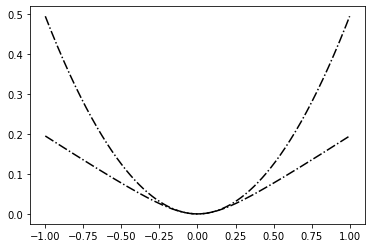

In [7]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + 
                        tf.square((target - x_vals)/delta1)) - 1.)

x_array = sess.run(x_vals)
phuber1_y_out = sess.run(phuber1_y_vals)
plt.plot(x_array, phuber1_y_out, 'k-.')

delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)
plt.plot(x_array, phuber2_y_out, 'k-.')

##### Loss functions for categorical outcomes. Lets create new dataset.

In [8]:
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

Hinge loss, mostly used for 'maximum-margin classifier', in SVM.

In machine learning, the hinge loss is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs).
Typically used for  classification problems.

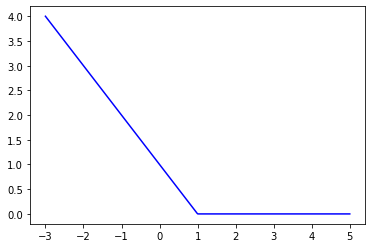

In [9]:
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-')

Cross-entropy loss for binary classifiers.

##### How does cross entropy loss work?
Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.

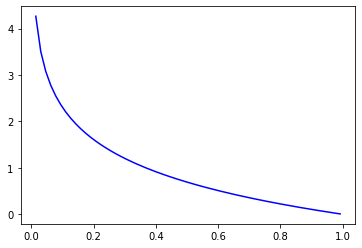

In [10]:
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)
x_array = sess.run(x_vals)
plt.plot(x_array, xentropy_y_out, 'b-')

Sigmoid cross entropy loss, x_val is normalized first with the help of sigmoid function, then we put them in cross entropy.

##### Binary Cross-Entropy Loss
Also called Sigmoid Cross-Entropy loss. It is a Sigmoid activation plus a Cross-Entropy loss.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


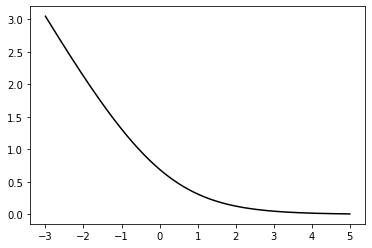

In [11]:
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels=targets)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)
x_array = sess.run(x_vals)
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-')

Weighted cross entropy loss, it is a weighted version of sigmoid cross entropy loss. The extra parameter weight multiply with positive target here.



Instructions for updating:
targets is deprecated, use labels instead


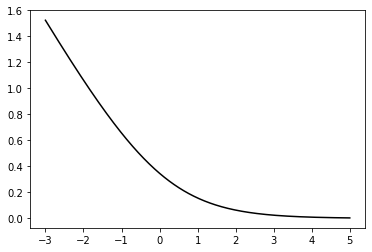

In [12]:
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(logits=x_vals, targets=targets, pos_weight=weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)
x_array = sess.run(x_vals)
plt.plot(x_array, xentropy_weighted_y_out, 'k-')

Combining all plot in one

In [ ]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

In [ ]:
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Enropy Loss (x0.5)')
plt.ylim(-1.5, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()